<a href="https://colab.research.google.com/github/dntwaritag/Water_potability/blob/main/denys's_water_quality_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Excercise - Creating our own custom Model

**1. Import Required Libraries**

In [ ]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

# TensorFlow/Keras for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE


**2. Data Loading & Preprocessing**

In [ ]:
# Mount Google Drive (if using Colab)
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
# Load the dataset
dataset_path = '/content/drive/MyDrive/Mathematics for Machine Learning/water_potability.csv'
df = pd.read_csv(dataset_path)

# Display first few rows
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# Handling Missing Values
# Checking missing values
print("Missing Values:\n", df.isnull().sum())

# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)

df.head()

Missing Values:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  


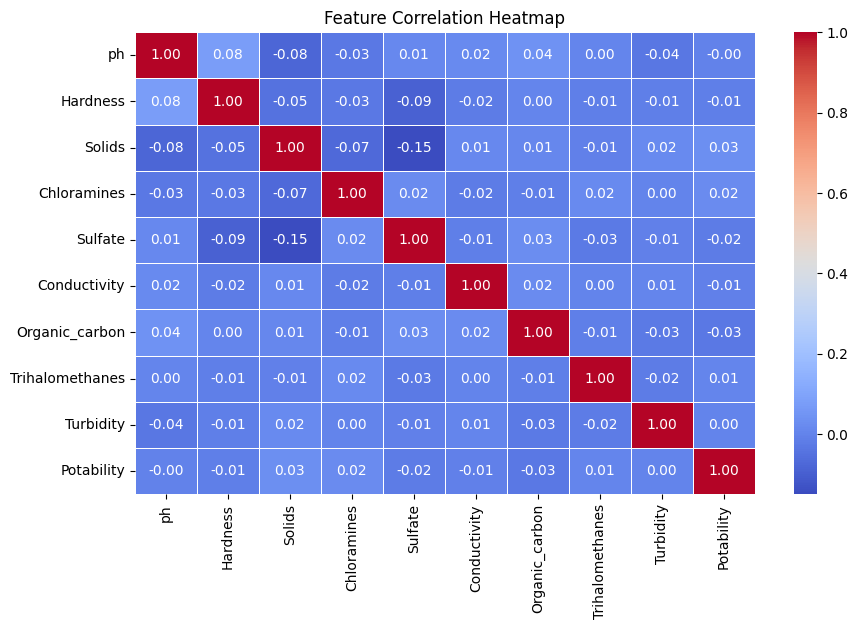

In [ ]:
# Exploratory Data Analysis (EDA)
# Check dataset summary
print(df.describe())

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap of feature correlation
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Define features and target variable
X = df.drop(columns=['Potability'])
y = df['Potability']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (3276, 9)
Shape of y: (3276,)


In [ ]:
# Apply Synthetic Minority Oversampling Technique (SMOTE)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split into Training (70%), Validation (15%), Testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42, stratify=y_resampled)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Print dataset size after oversampling
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Testing set: {X_test.shape}")


Training set: (2797, 9), Validation set: (599, 9), Testing set: (600, 9)


In [ ]:
# Compute class weights to give higher importance to the minority class
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("Class Weights:", class_weights_dict)


Class Weights: {0: 1.0003576537911303, 1: 0.9996426018584703}


**3. Data Splitting**

In [ ]:
# Split dataset into Training (70%), Validation (15%), Testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Print dataset sizes
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Testing set: {X_test.shape}")


Training set: (2293, 9), Validation set: (491, 9), Testing set: (492, 9)


**4. Model Architecture**

In [ ]:
def create_model(optimizer='adamax', dropout_rate=0.4, regularizer=l1_l2(l1=0.0001, l2=0.001)):
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=regularizer, input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(96, activation='relu', kernel_regularizer=regularizer),  # NEW LAYER ADDED
        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_regularizer=regularizer),
        Dropout(dropout_rate),
        Dense(32, activation='relu', kernel_regularizer=regularizer),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


**5. Training the Model**

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model using Adamax optimizer
model = create_model(optimizer=Adamax(learning_rate=0.0005), dropout_rate=0.4, regularizer=l1_l2(0.0001, 0.001))
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=32, class_weight=class_weights_dict, callbacks=[early_stopping])


Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5643 - loss: 1.1348 - val_accuracy: 0.6354 - val_loss: 1.1072
Epoch 2/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5839 - loss: 1.1165 - val_accuracy: 0.6415 - val_loss: 1.1008
Epoch 3/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5655 - loss: 1.1193 - val_accuracy: 0.6314 - val_loss: 1.0929
Epoch 4/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5299 - loss: 1.1261 - val_accuracy: 0.6334 - val_loss: 1.0882
Epoch 5/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6130 - loss: 1.0904 - val_accuracy: 0.6334 - val_loss: 1.0816
Epoch 6/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5946 - loss: 1.0864 - val_accuracy: 0.6334 - val_loss: 1.0771
Epoch 7/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5884 - loss: 1.0898 - val_accuracy: 0.6334 - val_loss: 1.0719
Epoch 8/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5715 - loss: 1.0896 - val_accuracy: 0.6334 - val_loss: 1.0

**6. Evaluate the Model**

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.689
Precision: 0.654
Recall: 0.368
F1 Score: 0.471


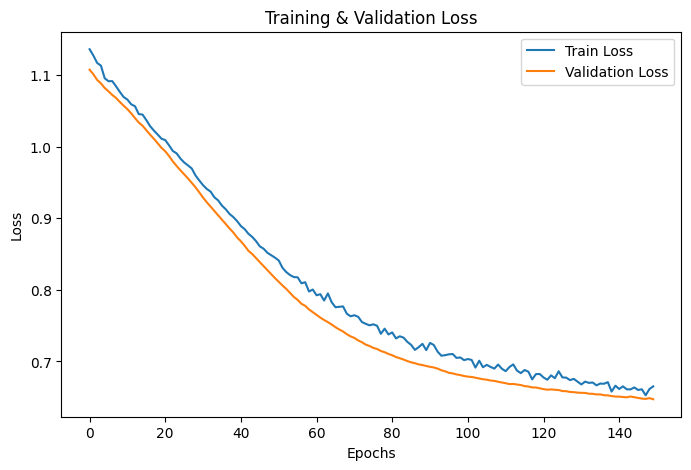

In [ ]:
# Predict test labels
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display performance metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Plot training loss curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.show()
